In [1]:
import json 
import os 
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

Seleccionamos un rango de valores para los parámetros de Q-Learning: alpha (factor de aprendizaje), épsilon (probabilidad de elegir una acción aleatoria) y gamma (factor de descuento).

In [2]:
alpha_values = [0.01,0.05,0.1,0.15,0.2,0.3]
gamma_values = [0.99,0.95,0.9,0.85,0.8]
epsilon_values = [i/20 for i in range(1,19)]
dic = {"alpha":alpha_values,"gamma":gamma_values,"epsilon":epsilon_values}

Descargamos los diccionarios con los resultados del experimento:

In [37]:
def open_dic(file_path):
    """
    Open json file as a dictionary
    """
    with open(file_path) as json_file:
        dic = json.load(json_file)  
    return dic

In [4]:
""" 
Los diccionarios tienen siguente estructura:
"(alpha, gamma, epsilon)": metrica
"""

# Distancía cubierta / Distancía por cubrir:
coverage_distance_dic = open_dic('./Experiments/coverage_distance_dic.json') 
# Segmentos cubiertos / Segmentos por cubrir
cumulated_reward_dic = open_dic('./Experiments/cumulated_reward_dic.json')
# Recompensa acomulada
segments_covered_dic = open_dic('./Experiments/segments_covered_dic.json')

In [5]:
def check_hyperparemeters(fijar, dic):
    """
    Comprobación que el hiperparametro esté bien escrito
    """
    if fijar[0] not in dic or fijar[1] not in dic:
        raise Exception("El hiperparametro indicado no se encruentra, asegurate introducir correcto el nombre hiperparametro")

In [6]:
def check_introduced_values(fijar,valor_fijo, dic):
    """
    Comprobación que el valor del hiperparametro está en el diccionario
    """
    if valor_fijo[0] not in dic[fijar[0]] or valor_fijo[1] not in dic[fijar[1]]:
        raise Exception("Valor fijo no se usa en el hiperparametro indicado, asegurate de que  ese valor se usa en el hiperparametro")

In [20]:
def get_values(hyperparam, metrica, no_fijo, fijar, valor_fijo, grid):
    """
    Sacar la lista de los valores de la metrica en función del hiperparametro objectivo
    con valores de otros dos hiperparametros fijos
    """
    values = np.zeros(shape=len(grid)) #valores de la metrica 
    for key in metrica: 
        key_tuple = eval(key) #str --> tuple

        if key_tuple[hyperparam.index(fijar[0])]==valor_fijo[0] and key_tuple[hyperparam.index(fijar[1])]==valor_fijo[1] :
            indice_valor = grid.index(key_tuple[hyperparam.index(no_fijo)]) #cogemos la posicion del valor en el grid 
            values[indice_valor] = metrica[key]        
    return values

In [33]:
def plot_graph(grid,values,metric_name, no_fijo, fijar, valor_fijo):
    """
    Imprimir la grafica con matplotlib
    """
    fig,axes = plt.subplots()
    axes.plot(grid,values, color ='green')
    axes.set_title(fijar[0]+" = "+ str(valor_fijo[0])+" y "+fijar[1]+" = "+str(valor_fijo[1]))
    axes.set_xlabel(no_fijo)
    axes.set_ylabel(metric_name)
    plt.show()
    

In [31]:
def graph_2d(dic, metrica, metric_name, fijar, valor_fijo):
    """
    Sacar una grafica 2D de los resultados para una metrica para 
    un hiperparametro obectivo fijando otros dos hiperparametros
    """
    check_hyperparemeters(fijar, dic)
    check_introduced_values(fijar,valor_fijo, dic)
    
    hyperparam = list(dic) #Lista de los nombres de hyperparametros que hay en el diccionario
    
    not_fixed = [i for i in hyperparam if i not in fijar] #Hypeparametro no fijo de interes
    grid = dic[not_fixed[0]] #Lista de los valores del hiperparametro de interes
    
    values = get_values(hyperparam, metrica, not_fixed[0], fijar, valor_fijo, grid)  
    
    plot_graph(grid,values,metric_name, not_fixed[0], fijar, valor_fijo) 

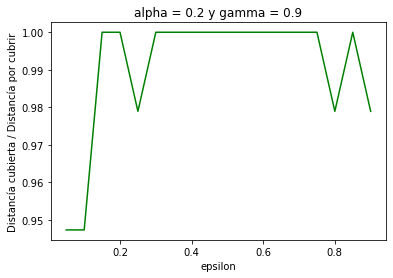

In [34]:
graph_2d(dic, coverage_distance_dic, "Distancía cubierta / Distancía por cubrir",  ["alpha","gamma"], [0.2,0.9])

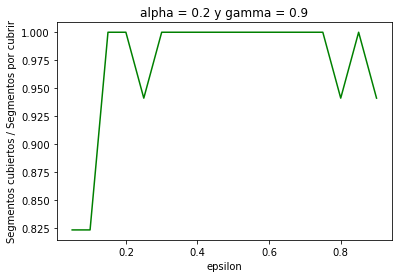

In [35]:
graph_2d(dic, segments_covered_dic, "Segmentos cubiertos / Segmentos por cubrir",  ["alpha","gamma"], [0.2,0.9])

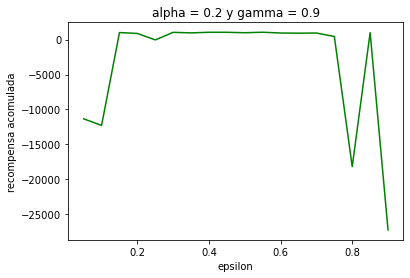

In [36]:
graph_2d(dic, cumulated_reward_dic, "Recompensa acomulada",  ["alpha","gamma"], [0.2,0.9])